<a href="https://colab.research.google.com/github/KauaHenSilva/python_style_transfer/blob/main/style_transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importes

In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Baixando network VGG19

In [31]:
network = tf.keras.applications.VGG19(include_top=False)

In [32]:
network.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
len(network.layers)

22

## Carregamento e pré-processamento

In [34]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2

# Drive: https://drive.google.com/drive/folders/1EUdRpr5YXNgffO9qg4pY0243__Tz5PQC?usp=sharing
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### img conteudo

((1, 448, 598, 3), 1.0, 0.0)

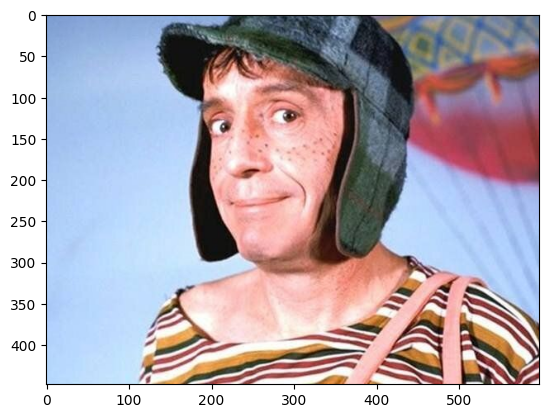

In [35]:
img_conteudo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/chaves.jpeg')
plt.imshow(img_conteudo)
img_conteudo = tf.keras.preprocessing.image.img_to_array(img_conteudo)
img_conteudo = img_conteudo / 255
img_conteudo = img_conteudo[tf.newaxis, :]
img_conteudo.shape, img_conteudo.max(), img_conteudo.min()

### Imagem estilo

((1, 560, 600, 3), 1.0, 0.0)

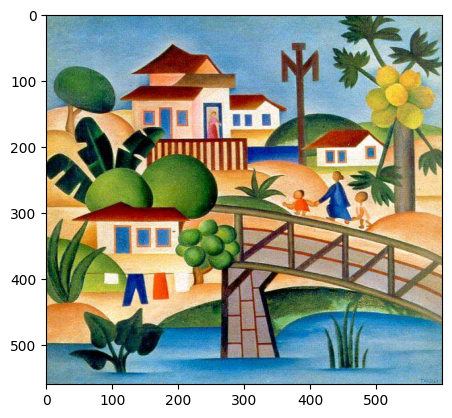

In [36]:
img_estilo = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/tarsila_amaral.jpg')
plt.imshow(img_estilo)
img_estilo = tf.keras.preprocessing.image.img_to_array(img_estilo)
img_estilo = img_estilo / 255
img_estilo = img_estilo[tf.newaxis, :]
img_estilo.shape, img_estilo.max(), img_estilo.min()

## Construção da network

In [37]:
camadas_conteudo = ['block4_conv2']
camadas_estilo = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
numero_camadas_conteudo = len(camadas_conteudo)
numero_camadas_estilo = len(camadas_estilo)

In [38]:
def vgg_camadas(nome_camadas):
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  outputs = [vgg.get_layer(nome).output for nome in nome_camadas]
  network = tf.keras.Model(inputs = [vgg.input], outputs = outputs)
  return network

In [39]:
extrator_estilo = vgg_camadas(camadas_estilo)
extrator_estilo.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,944,960 (49.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,944,960 (49.38 MB)

In [40]:
saidas_estilo = extrator_estilo(img_estilo)

In [41]:
# https://www.tensorflow.org/api_docs/python/tf/einsum
def gram_matrix(ativacoes):
  resultado = tf.linalg.einsum('bijc,bijd->bcd', ativacoes, ativacoes)
  input_shape = tf.shape(ativacoes)
  num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
  return resultado / num_locations

In [42]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, camadas_estilo, camadas_conteudo):
    super().__init__()
    self.vgg = vgg_camadas(camadas_estilo + camadas_conteudo)
    self.camadas_estilo = camadas_estilo
    self.camadas_conteudo = camadas_conteudo
    self.numero_camadas_estilo = len(camadas_estilo)
    self.vgg.trainable = False

  def call(self, imagem):
    imagem = imagem * 255.0
    imagem_preprocessada = tf.keras.applications.vgg19.preprocess_input(imagem)
    outputs = self.vgg(imagem_preprocessada)
    saidas_estilo = outputs[:self.numero_camadas_estilo] # 0-4
    saidas_conteudo = outputs[self.numero_camadas_estilo:] # 5:

    saidas_estilo = [gram_matrix(camada) for camada in saidas_estilo]

    conteudo_dict = {nome_conteudo: valor for nome_conteudo, valor in zip(self.camadas_conteudo, saidas_conteudo)}
    estilo_dict = {nome_estilo: valor for nome_estilo, valor in zip(self.camadas_estilo, saidas_estilo)}

    return {'conteudo': conteudo_dict, 'estilo': estilo_dict}

In [43]:
extrator = StyleContentModel(camadas_estilo, camadas_conteudo)

In [44]:
resultados = extrator(img_conteudo)

In [45]:
estilo_objetivo = extrator(img_estilo)['estilo']
conteudo_objetivo = extrator(img_conteudo)['conteudo']

In [46]:
len(estilo_objetivo), len(conteudo_objetivo)

(5, 1)

In [47]:
nova_imagem = tf.Variable(img_conteudo)

In [48]:
peso_conteudo = 1
peso_estilo = 1000

In [49]:
optimizer = tf.optimizers.Adam(learning_rate=0.02)

### Treinamento

In [50]:
precos_reais = np.array([10000, 15000])
previsoes = np.array([8000, 15900])

In [51]:
np.sum(abs(previsoes - precos_reais)) / 2

1450.0

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
mean_absolute_error(precos_reais, previsoes)

1450.0

In [54]:
mean_squared_error(precos_reais, previsoes)

2405000.0

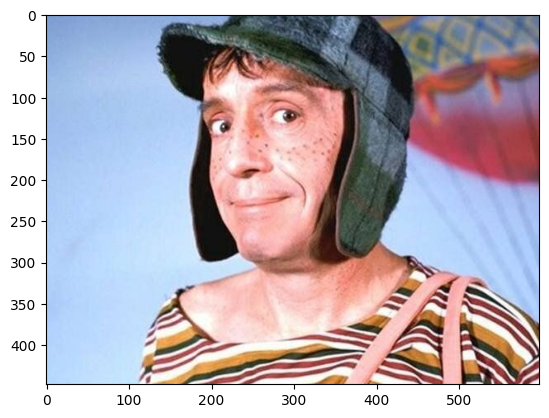

In [55]:
plt.imshow(tf.squeeze(img_conteudo, axis=0));

Época:  500  Conteúdo loss:  tf.Tensor(610665.44, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(516487940.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(103298200000.0, shape=(), dtype=float32)


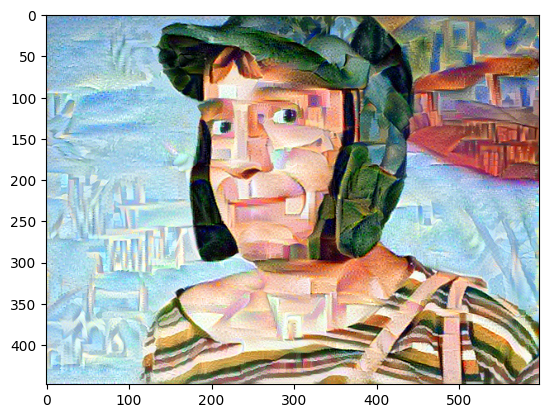

Época:  1000  Conteúdo loss:  tf.Tensor(644675.4, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(132749780.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(26550602000.0, shape=(), dtype=float32)


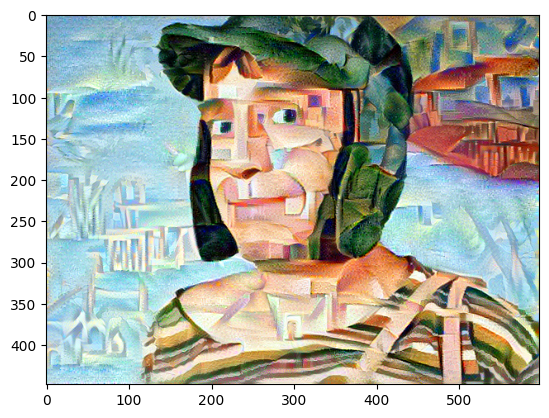

Época:  1500  Conteúdo loss:  tf.Tensor(660653.5, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(89141576.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(17828977000.0, shape=(), dtype=float32)


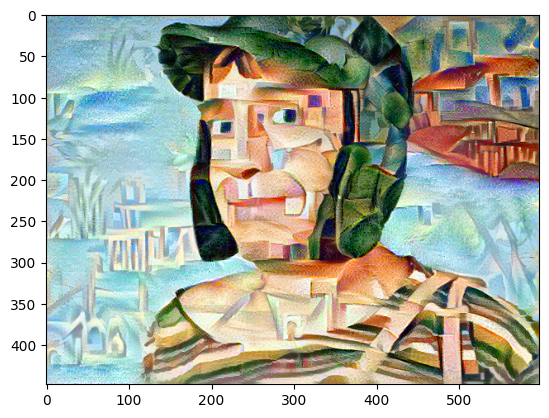

Época:  2000  Conteúdo loss:  tf.Tensor(674423.8, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(59525336.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(11905742000.0, shape=(), dtype=float32)


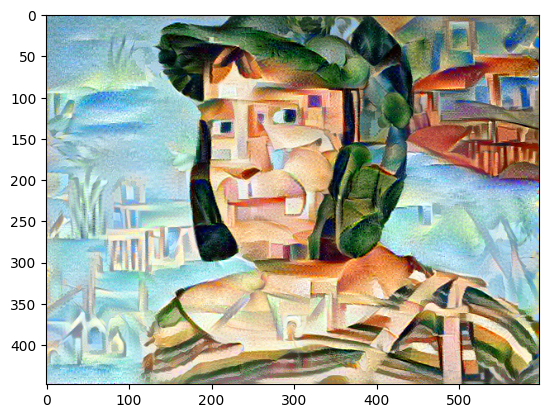

Época:  2500  Conteúdo loss:  tf.Tensor(683339.4, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(79864330.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(15973548000.0, shape=(), dtype=float32)


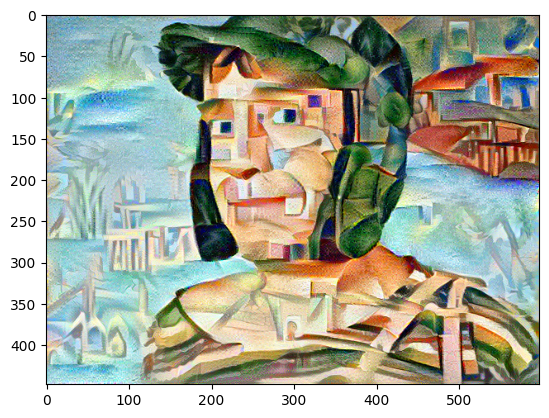

Época:  3000  Conteúdo loss:  tf.Tensor(692901.25, shape=(), dtype=float32)  Estilo loss:  tf.Tensor(61722596.0, shape=(), dtype=float32)  Total loss:  tf.Tensor(12345212000.0, shape=(), dtype=float32)


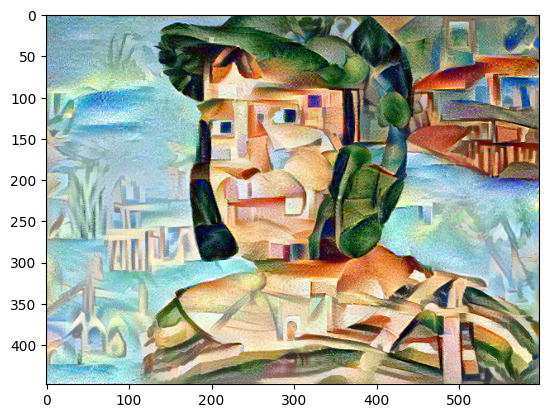

In [56]:
epocas = 3000
impressao = 500

for epoca in range(epocas):
  with tf.GradientTape() as tape:
    outputs = extrator(nova_imagem)

    saidas_conteudo = outputs['conteudo']
    saidas_estilo = outputs['estilo']

    conteudo_loss = tf.add_n([tf.reduce_mean((saidas_conteudo[nome] - conteudo_objetivo[nome]) ** 2) for nome in saidas_conteudo.keys()])
    estilo_loss = tf.add_n([tf.reduce_mean((saidas_estilo[nome] - estilo_objetivo[nome]) ** 2) for nome in saidas_estilo.keys()])
    total_loss = conteudo_loss * peso_conteudo / numero_camadas_conteudo + estilo_loss * peso_estilo / numero_camadas_estilo

  gradiente = tape.gradient(total_loss, nova_imagem)
  optimizer.apply_gradients([(gradiente, nova_imagem)])
  nova_imagem.assign(tf.clip_by_value(nova_imagem, 0.0, 1.0))

  if (epoca + 1) % impressao == 0:
    print('Época: ', epoca + 1, ' Conteúdo loss: ', conteudo_loss, ' Estilo loss: ', estilo_loss, ' Total loss: ', total_loss)
    plt.imshow(tf.squeeze(nova_imagem, axis=0));
    plt.show()

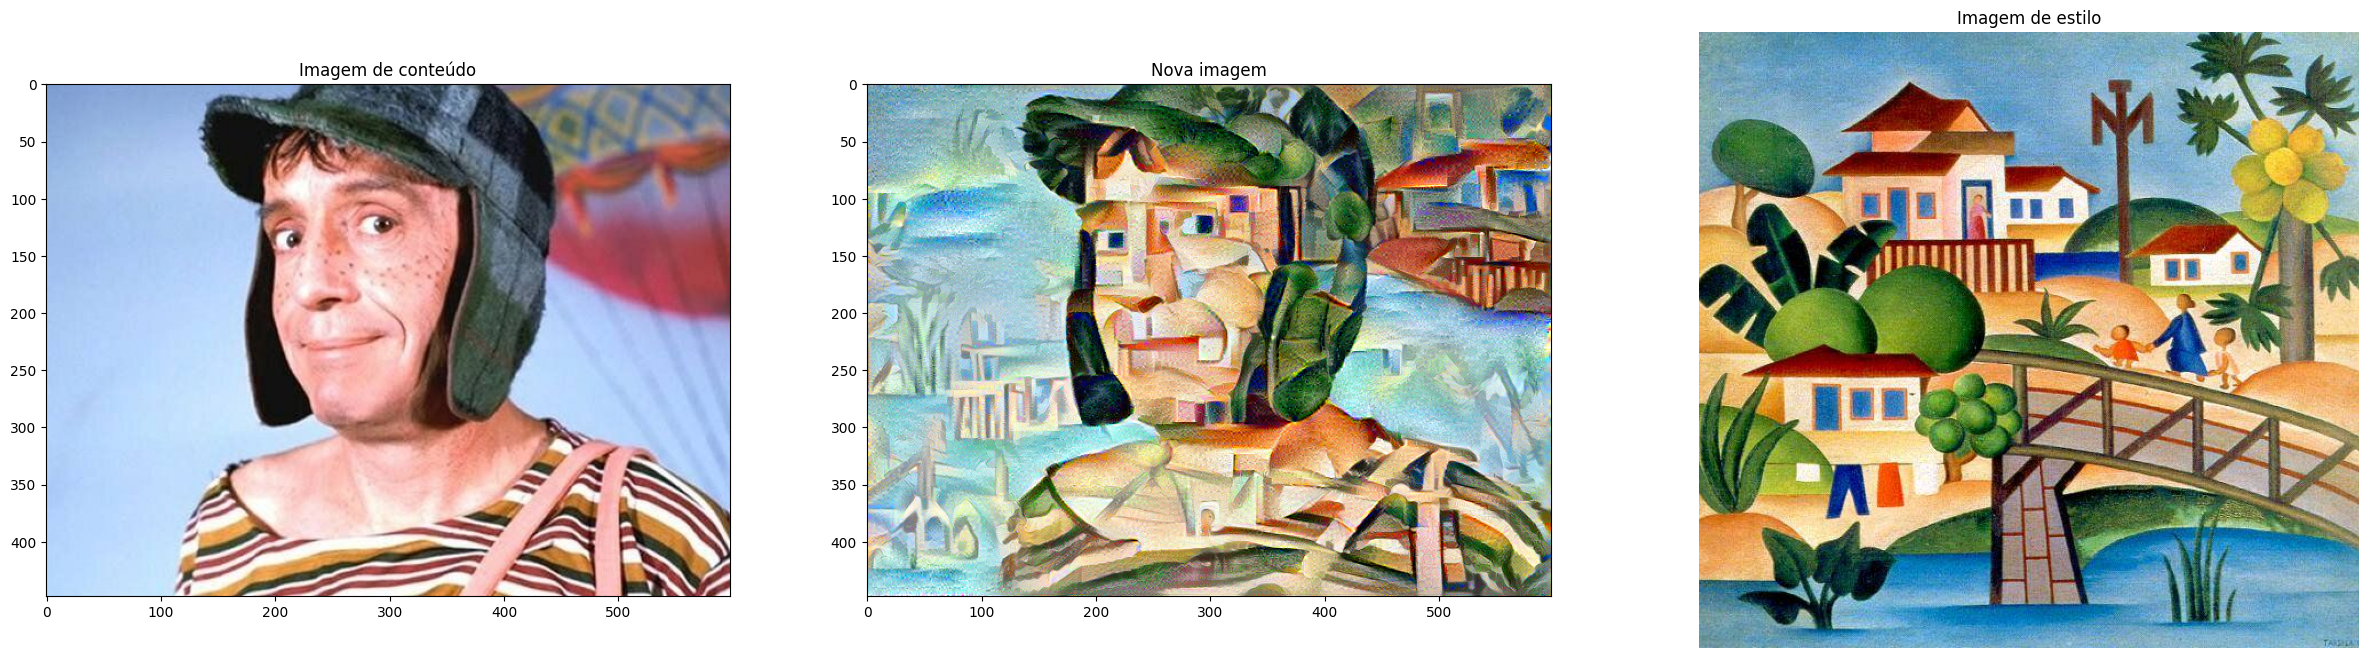

In [57]:
figura, (eixo1, eixo2, eixo3) = plt.subplots(1, 3, figsize=(30,8))
eixo1.imshow(tf.squeeze(img_conteudo, axis = 0))
eixo1.set_title('Imagem de conteúdo')
plt.axis('off')
eixo2.imshow(tf.squeeze(nova_imagem, axis = 0))
eixo2.set_title('Nova imagem')
plt.axis('off')
eixo3.imshow(tf.squeeze(img_estilo, axis = 0))
eixo3.set_title('Imagem de estilo')
plt.axis('off');